# Multiple Linear regression

## 1. Loading data

In [1]:
dat <- read.table("delivery_time.txt",header=T)
head(dat)
dim(dat)

Observation,Delivery_Time_y,NumberofCases_x1,Distance_x2_.ft.
1,16.68,7,560
2,11.50,3,220
3,12.03,3,340
4,14.88,4,80
5,13.75,6,150
6,18.11,7,330


[1] 25  4

## 2. Scatterplot diagram

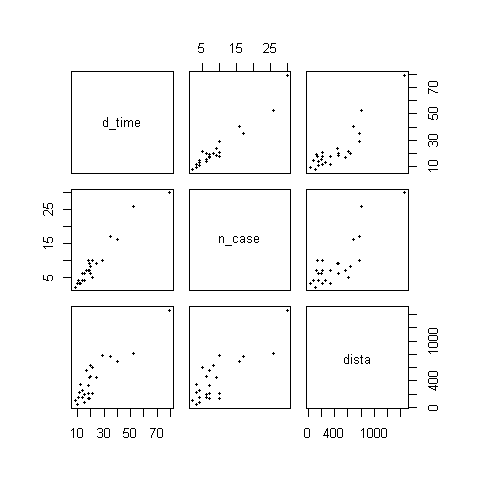

In [4]:
# plot size
options(repr.plot.width = 4, repr.plot.height = 4)

# scatter plot
pairs(dat[,2:4], pch = 19, cex = 0.5, cex.labels = 1)

## 3. Linear regression model

In [3]:
nl <- colnames(dat)
colnames(dat) <- c("obs", "d_time", "n_case", "dista")
attach(dat)

# linear model fit
res_lm <- lm(d_time ~ n_case + dista)
res_lm


Call:
lm(formula = d_time ~ n_case + dista)

Coefficients:
(Intercept)       n_case        dista  
    2.34123      1.61591      0.01438  


In [5]:
# summary of fitted model
summary(res_lm)


Call:
lm(formula = d_time ~ n_case + dista)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.7880 -0.6629  0.4364  1.1566  7.4197 

Coefficients:
            Estimate Std. Error t value Pr(>|t|)    
(Intercept) 2.341231   1.096730   2.135 0.044170 *  
n_case      1.615907   0.170735   9.464 3.25e-09 ***
dista       0.014385   0.003613   3.981 0.000631 ***
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 3.259 on 22 degrees of freedom
Multiple R-squared:  0.9596,	Adjusted R-squared:  0.9559 
F-statistic: 261.2 on 2 and 22 DF,  p-value: 4.687e-16


In [6]:
summary(res_lm)$coefficients

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.34123115,1.096730168,2.134738,4.417012e-02
n_case,1.61590721,0.170734918,9.464421,3.254932e-09
dista,0.01438483,0.003613086,3.981313,6.312469e-04


In [7]:
# anova table
anova(res_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
n_case,1,5382.4088,5382.40880,506.61936,1.112549e-16
dista,1,168.4021,168.40213,15.85085,6.312469e-04
Residuals,22,233.7317,10.62417,NA,NA


In [8]:
# modification of default anova table of R
anova2 <- function(x){
fit <- anova(x)
nrows <- nrow(fit)
fit[1,1:2] <- apply(fit[1:(nrows-1), 1:2], 2, sum)
fit <- fit[-(2:(nrows-1)), ]
fit[1,3] <- fit[1,2]/fit[1,1]
fit[1,4] <- fit[1,3]/fit[2,3]
rownames(fit)[1] <- "Regression"
fit[1,5] <- pf(fit[1,4], fit[1,1], fit[2,1], lower.tail=FALSE)
return(fit)
}

# modified anova table
anova2(res_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Regression,2,5550.8109,2775.40546,261.2351,4.687422e-16
Residuals,22,233.7317,10.62417,NA,NA


In [9]:
# residuals
res_tab <- cbind(d_time, fitted(res_lm), residuals(res_lm))
colnames(res_tab) <- c("y", "y_hat", "residual")
head(round(res_tab, digits=2))

y,y_hat,residual
16.68,21.71,-5.03
11.50,10.35,1.15
12.03,12.08,-0.05
14.88,9.96,4.92
13.75,14.19,-0.44
18.11,18.40,-0.29


In [10]:
anova2(res_lm)

,Df,Sum Sq,Mean Sq,F value,Pr(>F)
Regression,2,5550.8109,2775.40546,261.2351,4.687422e-16
Residuals,22,233.7317,10.62417,NA,NA


In [13]:
summary(res_lm)$sigma^2

[1] 10.62417

In [14]:
# sum of square total (SST)
sst <- sum((d_time-mean(d_time))^2)

# sum of square error (SSE)
sse <- deviance(res_lm)
cat("SSR:" , round(sst-sse,4), "\n")
cat("SSE:" , round(sse,4), "\n")
cat("SST:" , round(sst,4), "\n")

# degree of freedom (df)
df.r <- df.residual(res_lm) #n-p-1

#F-statistics
p <- 2
f_stat <- ((sst-sse)/p)/(sse/df.r)
res_pval <- pf(f_stat, p, df.residual(res_lm), lower.tail=FALSE)
cat("F-value:" , round(f_stat,4), "\n")
cat("Pr(>F):" , res_pval, "\n")

SSR: 5550.811 
SSE: 233.7317 
SST: 5784.543 
F-value: 261.2351 
Pr(>F): 4.687422e-16 


## 4. Confidence interval of coefficients

In [15]:
summary(res_lm)$coef

,Estimate,Std. Error,t value,Pr(>|t|)
(Intercept),2.34123115,1.096730168,2.134738,4.417012e-02
n_case,1.61590721,0.170734918,9.464421,3.254932e-09
dista,0.01438483,0.003613086,3.981313,6.312469e-04


In [16]:
 # C.I. of beta1(n_case)
sfit <- summary(res_lm)
t.025 <- qt(0.975, df.residual(res_lm))
c(sfit$coef[2,1] - t.025*sfit$coef[2,2], sfit$coef[2,1] + t.025*sfit$coef[2,2])

[1] 1.261825 1.969990

In [19]:
# using confint function
confint(res_lm)

,2.5 %,97.5 %
(Intercept),0.066751987,4.61571030
n_case,1.261824662,1.96998976
dista,0.006891745,0.02187791


In [18]:
confint(res_lm, parm='n_case', level = 0.95)

,2.5 %,97.5 %
n_case,1.261825,1.96999


- C.I. on the mean response at a particular point x0

In [20]:
x0 <- c(1, 8, 275)
y0 <- sum(x0*coef(res_lm))
t.025 <- qt(0.975, df.residual(res_lm))
x <- model.matrix(res_lm)
xtxi <- solve(t(x) %*% x)
bm <- sqrt(x0 %*% xtxi %*% x0) *t.025 * summary(res_lm)$sigma
cat("C.I. on the mean response at the point x_0=(1,8,275) \n (",
    round(y0-bm,3), ", ", round(y0+bm,3), ")\n")

C.I. on the mean response at the point x_0=(1,8,275) 
 ( 17.654 ,  20.795 )


## 5. Partial F test

Investigate the contribution of the distance (x2) to the model
    - H0 : coefficient of ‘dist’ $ = 0$
    - H0 : β2 = 0

In [22]:
res_reduce <- lm(d_time ~ n_case)

#SSE of Reduced Model
sse1 <- deviance(res_reduce)

f_stat_reduce <- (deviance(res_reduce)-deviance(res_lm))/ (deviance(res_lm)/df.residual(res_lm))

res_pf <- pf(f_stat_reduce, 1, df.residual(res_lm), lower.tail=FALSE)

cat("F_0:", round(f_stat_reduce,3), "\n")
cat("Pr(>F):" , round(res_pf,3), "\n")

F_0: 15.851 
Pr(>F): 0.001 
